In [2]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel(r"C:\Users\eprmitr\Desktop\TIGER\Mortgage Insurance Cross Sell.xls")

#Converting columns into lower case
df.columns = [i.lower() for i in df.columns]
df.head()

,ref,credit_score,final_grade,term,net_advance,apr,loan_type,mosaic,mosaic_class,time_at_address,...,cifas_detected,time_since_most_recent_outstandi,insurance_description,ppi,code,prdt_desc,category,ppi_single,ppi_joint,ppi_lci
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,N,99,Single,1,718.0,LASCI,Single,1,0,0


# Data Engineering

In [4]:
df.shape

(16383, 59)

In [5]:
df.ppi.value_counts()

1    9461
0    6922
Name: ppi, dtype: int64

In [6]:
df.loan_type.value_counts()

UnSecured    13054
secured       3329
Name: loan_type, dtype: int64

In [7]:
#Duplicate check
dup=df[df.duplicated()]
print(dup)

Empty DataFrame
Columns: [ref, credit_score, final_grade, term, net_advance, apr, loan_type, mosaic, mosaic_class, time_at_address, residential_status, telephone_indicator, number_of_dependants, marital_status, gender, time_in_employment, employment_status, full_part_time_empl_ind, perm_temp_empl_ind, income_range, current_account, access_card, visa_card, american_express, diners_card, cheque_guarantee, other_credit_store_card, time_with_bank, value_of_property, outstanding_mortgage_bal, total_outstanding_balances, bureau_data___monthly_other_co_r, worst_history_ct, payment_method, age, total_outstanding_balance__mortg, total___public_info___ccj____ban, total_value__public_info___ccj__, time_since_most_recent_public_in, total_value__cais_8_9s, worst_status_l6m, worst_current_status, __of_status_3_s_l6m, searches___total___l6m, years_on_er_for_sp, bankruptcy_detected__sp_, total___outstanding_ccj_s, total_outstanding_balance___excl, total___of_accounts, cifas_detected, time_since_most_r

##### Theres no duplicate in the dataset

# Descriptive Statistics

In [8]:
df.describe()

,ref,credit_score,term,net_advance,apr,mosaic,mosaic_class,time_at_address,number_of_dependants,time_in_employment,...,years_on_er_for_sp,total___outstanding_ccj_s,total_outstanding_balance___excl,total___of_accounts,time_since_most_recent_outstandi,ppi,code,ppi_single,ppi_joint,ppi_lci
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,...,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,9405.000000,16383.000000,16383.000000,16383.000000
mean,21168.695294,882.061832,59.142892,7364.007758,18.754587,29.419703,5.352683,120.488128,0.808460,103.096075,...,6.572667,0.157602,137.793628,5.984679,91.697308,0.577489,743.303243,0.382348,0.074773,0.120369
std,12142.797527,93.149605,26.689123,6673.343595,9.662504,16.718957,5.130278,109.192185,1.118947,91.541972,...,7.449055,0.540908,145.935978,2.669217,22.092297,0.493974,24.283753,0.485976,0.263032,0.325402
min,1.000000,352.000000,6.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,517.000000,0.000000,0.000000,0.000000
25%,10699.000000,818.000000,48.000000,3000.000000,9.900000,16.000000,3.000000,38.000000,0.000000,38.000000,...,1.000000,0.000000,34.000000,4.000000,99.000000,0.000000,716.000000,0.000000,0.000000,0.000000
50%,21303.000000,882.000000,60.000000,5300.000000,16.900000,25.000000,4.000000,84.000000,0.000000,72.000000,...,4.000000,0.000000,93.000000,6.000000,99.000000,1.000000,756.000000,0.000000,0.000000,0.000000
75%,31689.000000,947.000000,60.000000,9000.000000,24.900000,44.000000,8.000000,180.000000,1.000000,144.000000,...,10.000000,0.000000,194.000000,9.000000,99.000000,1.000000,759.000000,1.000000,0.000000,0.000000
max,42072.000000,1295.000000,300.000000,75000.000000,50.400000,99.000000,99.000000,864.000000,30.000000,600.000000,...,34.000000,9.000000,999.000000,9.000000,99.000000,1.000000,779.000000,1.000000,1.000000,1.000000


# Data visualizations

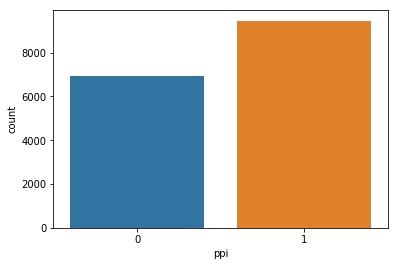

In [9]:
sns.countplot(df['ppi'])

#### The target is okay, looks balanced

All the Exploratory Data Analysis is done in Tableau (only few are here)

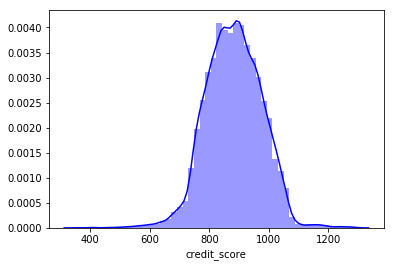

In [10]:
#plt.figure(figsize=(10,8))
sns.distplot(df[['credit_score']['ppi'=='1']], color="blue")
#sns.distplot(df[['credit_score']['ppi'=='0']] , color="red")

plt.show()

ppi                0     1    All
cifas_detected                   
N               6890  9402  16292
T                  4     4      8
Y                 28    55     83
All             6922  9461  16383


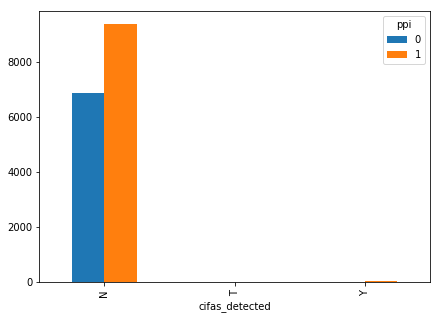

In [11]:
# Fraud detection
print(pd.crosstab(df.cifas_detected,df.ppi,margins=True))
pd.crosstab(index=df['cifas_detected'], columns=df['ppi']).plot(kind='bar',figsize=(7,5))

(i) Cifas & (ii) bankruptcy_detected__sp_ are pretty similar (only CIFAS selected)

Cifas detected ='Y' are potential fraudulant cases, should not be targeted; Only "N" cases to be targeted

ppi                  0     1    All
worst_status_l6m                   
0                 4241  5243   9484
1                 1625  2315   3940
2                  552   905   1457
3                  249   464    713
4                   74   164    238
5                   52   115    167
6                  129   255    384
All               6922  9461  16383


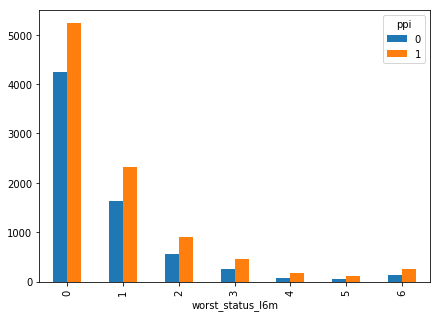

In [12]:
# Risk (loan/CC payment misses in last 6 months)
print(pd.crosstab(df.worst_status_l6m,df.ppi,margins=True))
pd.crosstab(index=df['worst_status_l6m'], columns=df['ppi']).plot(kind='bar',figsize=(7,5))

As per last 6months data (0 misses loan/CC payment cases) are best for Cross sell offerings

ppi        0     1    All
gender                   
F       2711  3902   6613
M       4211  5559   9770
All     6922  9461  16383


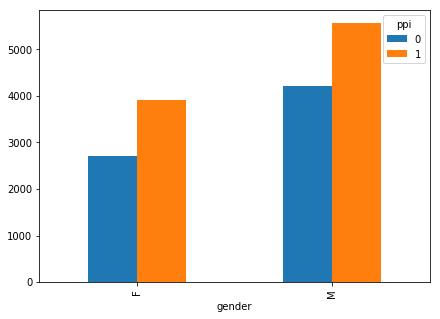

In [13]:
# Gender Vs PPI
print(pd.crosstab(df.gender,df.ppi,margins=True))
pd.crosstab(index=df['gender'], columns=df['ppi']).plot(kind='bar',figsize=(7,5))

Gender looks equally distributed, not a major feature

ppi              0     1    All
mosaic_class                   
1              936   542   1478
2             1107  1106   2213
3              830   908   1738
4             1242  1892   3134
5              214   339    553
6              260   606    866
7              557  1225   1782
8             1034  1889   2923
9              130   224    354
10             320   400    720
11             279   309    588
99              13    21     34
All           6922  9461  16383


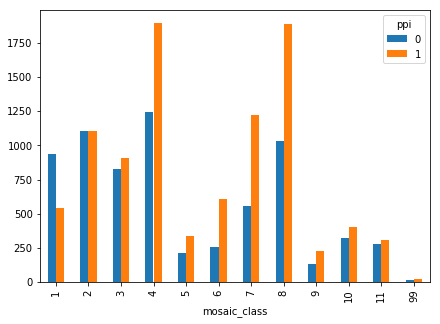

In [14]:
# Loan Vs PPI
print(pd.crosstab(df.mosaic_class,df.ppi,margins=True))
pd.crosstab(index=df['mosaic_class'], columns=df['ppi']).plot(kind='bar',figsize=(7,5))

# Data Prep

In [15]:
#changing categorical value to numerical values
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [16]:
cat_col = ['loan_type', 'residential_status','final_grade','employment_status','perm_temp_empl_ind',\
           'full_part_time_empl_ind','cifas_detected','gender','marital_status','bankruptcy_detected__sp_',\
           'telephone_indicator','current_account','access_card','visa_card','american_express',\
           'diners_card','cheque_guarantee','other_credit_store_card','payment_method']

df = pd.get_dummies(df, columns=cat_col)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 100 columns):
ref                                 16383 non-null int64
credit_score                        16383 non-null int64
term                                16383 non-null int64
net_advance                         16383 non-null float64
apr                                 16383 non-null float64
mosaic                              16383 non-null int64
mosaic_class                        16383 non-null int64
time_at_address                     16383 non-null int64
number_of_dependants                16383 non-null int64
time_in_employment                  16383 non-null int64
income_range                        16383 non-null int64
time_with_bank                      16383 non-null int64
value_of_property                   16383 non-null int64
outstanding_mortgage_bal            16383 non-null int64
total_outstanding_balances          16383 non-null int64
bureau_data___monthly_other_co_

In [18]:
df = df.drop(['insurance_description','prdt_desc','code','category','ppi_single','ppi_joint','ppi_lci'],axis=1)

# Feature Selection

feature = ['credit_score', 'final_grade', 'term', 'net_advance', 'loan_type', 
           'mosaic', 'time_at_address','residential_status', 'number_of_dependants',
           'marital_status', 'gender', 'time_in_employment', 'employment_status',
           'full_part_time_empl_ind', 'perm_temp_empl_ind', 'income_range',
           'time_with_bank', 'total_outstanding_balances', 
            'age','total_outstanding_balance__mortg', 'total___public_info___ccj____ban',
           'total_value__public_info___ccj__', 'time_since_most_recent_public_in',
           'total_value__cais_8_9s', 'worst_status_l6m', 'worst_current_status',
           '__of_status_3_s_l6m', 'searches___total___l6m', 'years_on_er_for_sp',
           'bankruptcy_detected__sp_', 'total___outstanding_ccj_s',
           'total_outstanding_balance___excl', 'total___of_accounts',
           'cifas_detected', 'time_since_most_recent_outstandi','ppi']

df=df[feature]

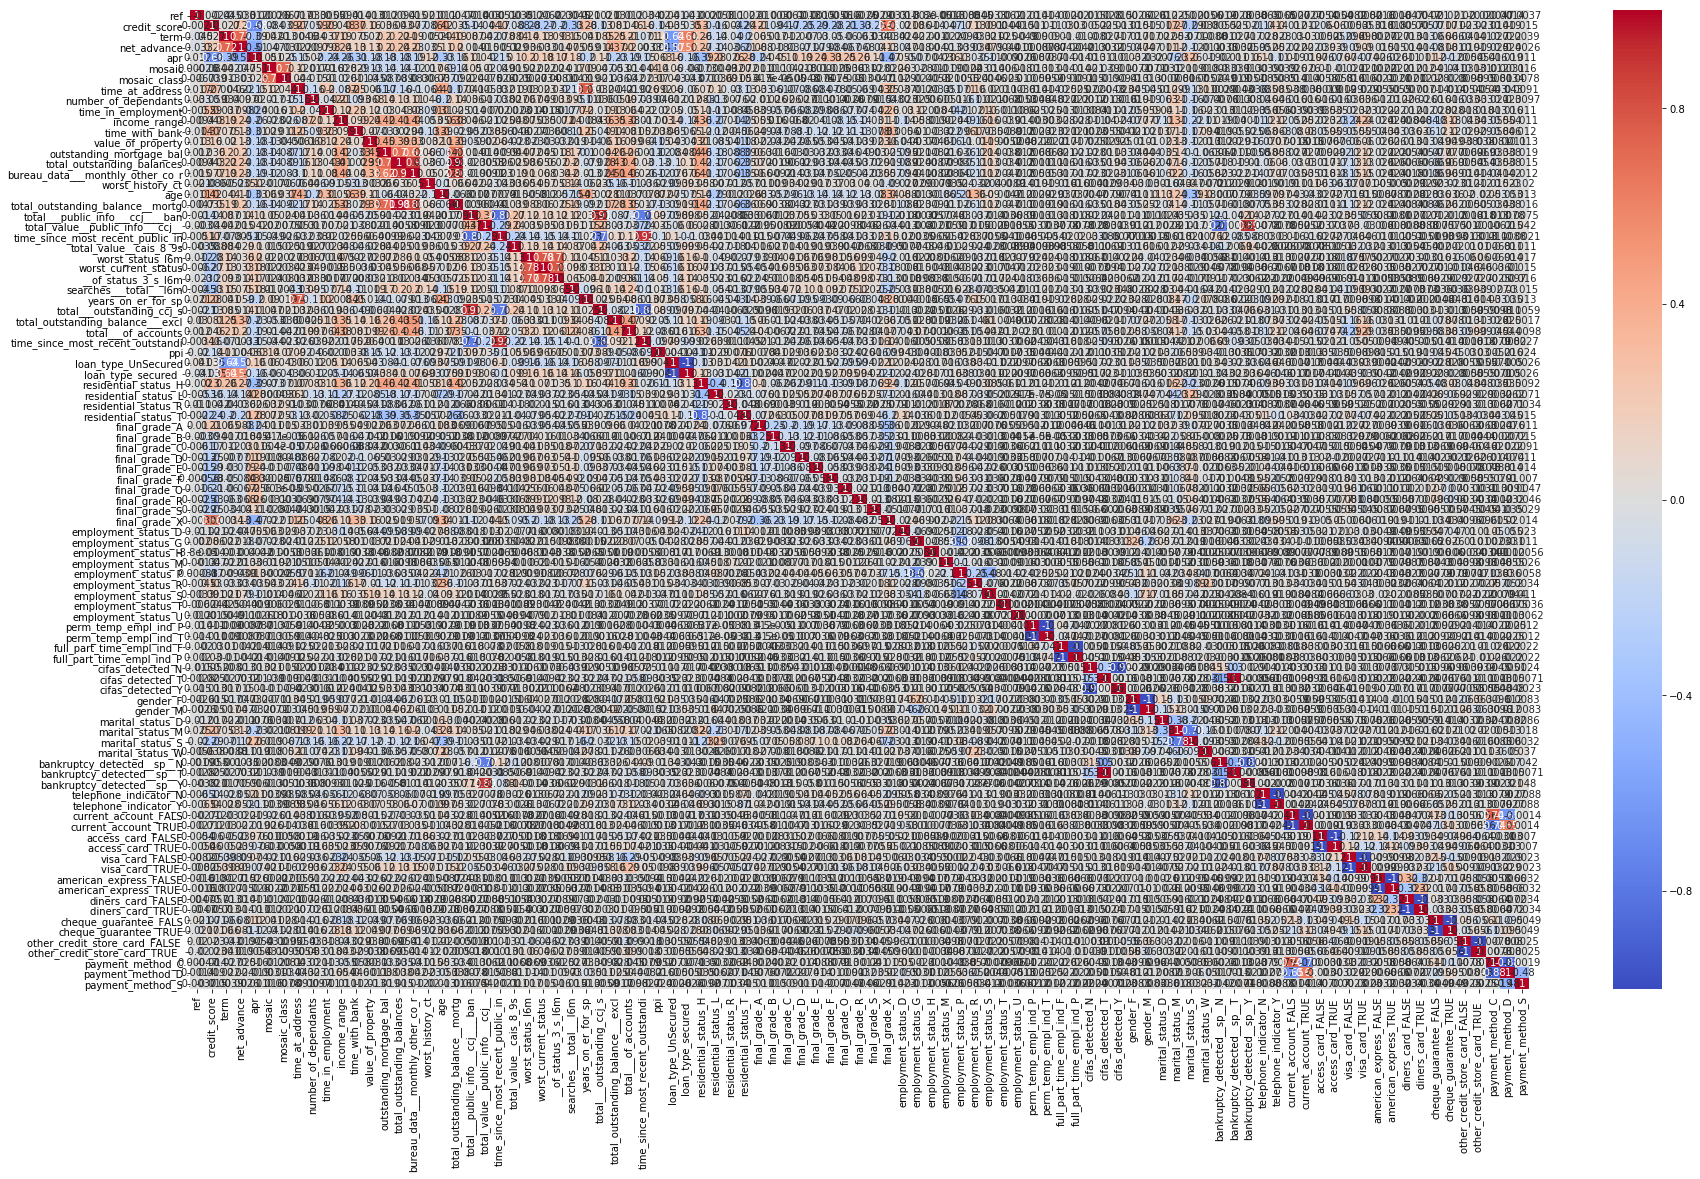

In [19]:
corr=df.corr()
plt.figure(figsize=(30,18))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [20]:
x=df.drop(['ppi'],axis=1) 
y=df['ppi']

[2.71553920e-02 3.00750373e-02 2.70170332e-02 2.67489600e-02
 2.72488334e-02 3.22721934e-02 2.64542930e-02 2.92368471e-02
 2.18810163e-02 2.63625394e-02 3.33557376e-02 2.77028196e-02
 2.51809383e-02 2.32786147e-02 2.82784193e-02 2.65387278e-02
 2.02873251e-02 2.95154247e-02 2.24583984e-02 5.37660911e-03
 5.43478487e-03 8.74785113e-03 1.89569855e-02 2.00751382e-02
 1.48007376e-02 7.15718961e-03 2.56189918e-02 2.68887756e-02
 4.16652636e-03 2.66891419e-02 2.76180097e-02 7.20210953e-03
 1.16134616e-02 1.02008487e-02 9.23538950e-03 2.22937197e-03
 1.46754137e-03 6.99180094e-03 1.02555958e-02 8.33963369e-03
 7.63251674e-03 6.66511878e-03 5.82772792e-03 4.37292890e-03
 2.68431369e-03 2.69804422e-03 1.19275214e-03 9.67019430e-03
 2.63285917e-03 9.03738056e-03 3.83412867e-05 1.90066634e-03
 1.12592296e-02 3.51277313e-03 7.86863996e-03 5.60415529e-05
 1.15107335e-04 2.87871999e-04 2.45929449e-04 8.53128654e-04
 8.88795408e-04 8.35926327e-04 4.16772269e-05 7.75449380e-04
 1.26302404e-02 1.233415

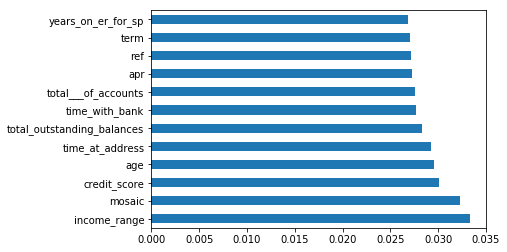

<Figure size 864x576 with 0 Axes>

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.figure(figsize=(12,8))
plt.show()

In [21]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


Original dataset shape Counter({1: 9461, 0: 6922})
Resampled dataset shape Counter({0: 9461, 1: 9461})


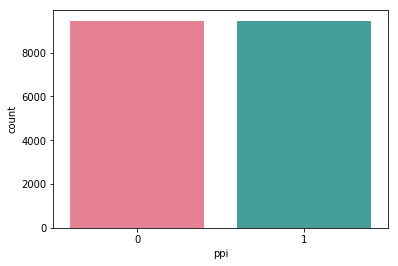

In [22]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_sample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=.3,random_state=555)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


#feature scaling
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train=mms.fit_transform(x_train)
x_test=mms.transform(x_test)

(13245, 92) (5677, 92) (13245,) (5677,)


In [24]:
print("-------LogisticRegression-------")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn import metrics

logreg = LogisticRegression(random_state=777, penalty='l2',class_weight='balanced')
logreg.fit(x_train,y_train)
ypred_lr = logreg.predict(x_test)
accuracy_lr = accuracy_score(y_test,ypred_lr)
recall_lr = recall_score(ypred_lr,y_test)
precision_lr=precision_score(ypred_lr,y_test)
f1score_lr=f1_score(ypred_lr,y_test)

cm=confusion_matrix(y_test,ypred_lr)
auc_lr = metrics.roc_auc_score(y_test, ypred_lr)
print("======AUC=======") 
print(auc_lr)
print("======Confusion Matrix=======") 
print(cm)
print("======Accracy Scores=======") 
print ("LR Train Accuracy :: ", accuracy_score(y_train,logreg.predict(x_train)))
print ("LR Test Accuracy  :: ", accuracy_score(y_test, ypred_lr))

-------LogisticRegression-------
======AUC=======
0.6542532772668979
======Confusion Matrix=======
[[1883 1004]
 [ 959 1831]]
======Accracy Scores=======
LR Train Accuracy ::  0.6533786334465836
LR Test Accuracy  ::  0.6542187775233398


C:\Users\eprmitr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [1, 5, 7, 10],
    'max_features': [3,4,5,6],
    'n_estimators': [10, 30, 50, 100, 200]}

from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(random_state = 14, n_jobs=-1)

grid_search = GridSearchCV(estimator=rforest, param_grid=params, 
                          cv=4, n_jobs=4, verbose=1, scoring = "roc_auc")

In [26]:
grid_search.fit(x_train,y_train)
rf_best = grid_search.best_estimator_
ypred_rf = rf_best.predict(x_test)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


In [27]:
print("-------RandomForest-------")
from sklearn import metrics 
accuracy_rf = accuracy_score(y_test,ypred_rf)
recall_rf = recall_score(y_test,ypred_rf)
precision_rf=precision_score(ypred_rf,y_test)
f1score_rf=f1_score(ypred_rf,y_test)

cm=confusion_matrix(y_test,ypred_rf)
auc_rf = metrics.roc_auc_score(y_test, ypred_rf)
print("======AUC=======") 
print(auc_rf)
print("======Confusion Matrix=======") 
print(cm)

print("======Accracy Scores=======") 
print ("RF Train Accuracy :: ", accuracy_score(y_train,rf_best.predict(x_train)))
print ("RF Test Accuracy  :: ", accuracy_score(y_test,ypred_rf))

-------RandomForest-------
======AUC=======
0.688229773065019
======Confusion Matrix=======
[[1925  962]
 [ 810 1980]]
======Accracy Scores=======
RF Train Accuracy ::  0.7817289543223858
RF Test Accuracy  ::  0.6878633080852563


In [28]:
print("-------XGBClassifier-------")
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1,learning_rate =0.1,
                     n_estimators=750,
                     max_depth=15,
                     gamma=0.1,
                     n_jobs=-1,
                     min_samples_split = 5,
                     min_samples_leaf = 1)
                                  

xgb.fit(x_train, y_train)
ypred_xgb = xgb.predict(x_test)
auc_xgb = metrics.roc_auc_score(y_test, ypred_xgb)
cm=confusion_matrix(ypred_xgb,y_test)
accuracy_xgb = accuracy_score(ypred_xgb,y_test)
recall_xgb = recall_score(ypred_xgb,y_test)
precision_xgb=precision_score(ypred_xgb,y_test)
f1score_xgb=f1_score(ypred_xgb,y_test)

print("======AUC=======") 
print(auc_xgb)
print("======Confusion Matrix=======") 
print(cm)
print("======Accracy Scores=======") 
print ("XGB Train Accuracy :: ", accuracy_score(y_train,xgb.predict(x_train)))
print ("XGB Test Accuracy  :: ", accuracy_score(y_test,ypred_xgb))

-------XGBClassifier-------


C:\Users\eprmitr\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\eprmitr\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


[17:44:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


======AUC=======
0.7429515328260538
======Confusion Matrix=======
[[2123  696]
 [ 764 2094]]
======Accracy Scores=======
XGB Train Accuracy ::  1.0
XGB Test Accuracy  ::  0.7428219129822089


In [29]:
i = ['XGBoost Classifier','Random Forest Classifier','Logistic Regression']
d = {"Accuracy":[accuracy_xgb,accuracy_rf,accuracy_lr],"Recall":[recall_xgb,recall_rf,recall_lr],\
     "Precision":[precision_lr,precision_rf,precision_xgb],"f1_score":[f1score_lr,f1score_rf,f1score_xgb],\
     "AUC":[auc_xgb,auc_rf,auc_lr],}
result=pd.DataFrame(data=d,index=i)
result

,Accuracy,Recall,Precision,f1_score,AUC
XGBoost Classifier,0.742822,0.732680,0.656272,0.651022,0.742952
Random Forest Classifier,0.687863,0.709677,0.709677,0.690858,0.688230
Logistic Regression,0.654219,0.645855,0.750538,0.741501,0.654253


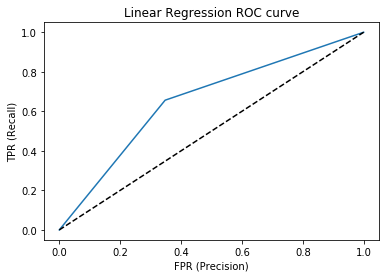

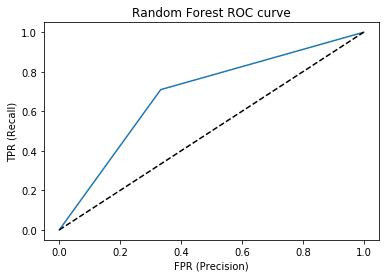

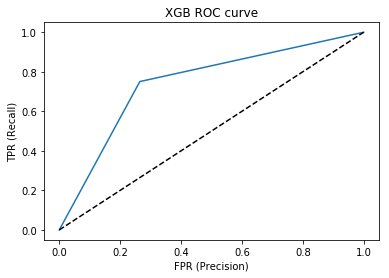

In [32]:
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, ypred_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, ypred_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, ypred_xgb)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr_lr,tpr_lr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()


plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr_rf,tpr_rf)
plt.plot((0,1), ls='dashed',color='black')
plt.show()


plt.title('XGB ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr_xgb,tpr_xgb)
plt.plot((0,1), ls='dashed',color='black')
plt.show()